# Creating a Spam Classifier Model
## NLP and Naive Bayes

The data used in this model is from the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load in Data in to Pandas Dataframe
df = pd.read_csv('smsspamcollection/SMSSpamCollection.txt', sep = '\t', header = None)
df.columns = ['label', 'text']

In [3]:
# Preview Data
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Visualization

In [4]:
# Import necessary NLP packages
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import string

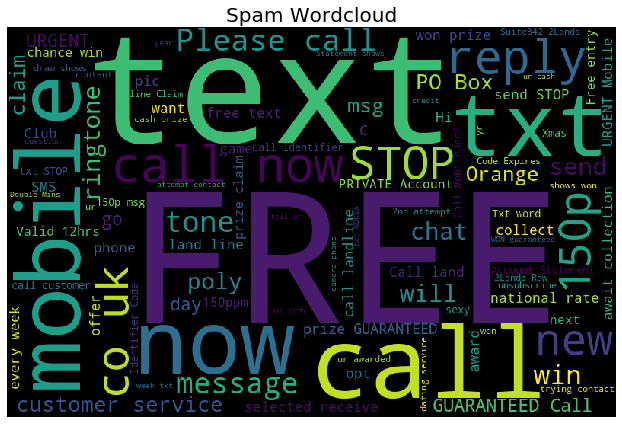

In [5]:
# Create wordcloud of spamwords
spamwords = ' '.join(list(df[df.label == 'spam']['text']))
spam_wc = WordCloud(width = 800, height = 512, max_words = 100, random_state = 14).generate(spamwords)
plt.figure(figsize = (10, 6), facecolor = 'white')
plt.imshow(spam_wc)
plt.axis('off')
plt.title('Spam Wordcloud', fontsize = 20)
plt.tight_layout()
plt.show()

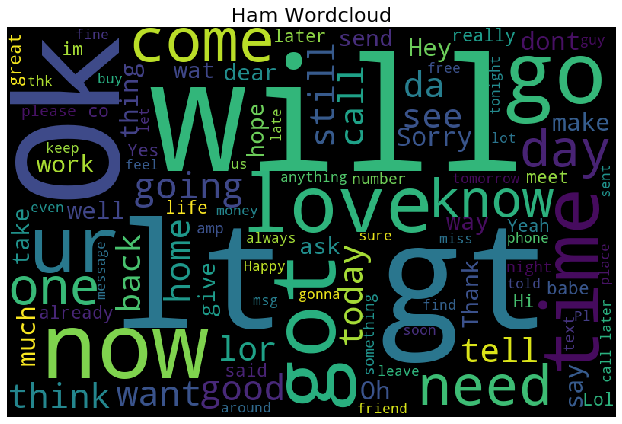

In [6]:
# Create wordcloud of hamwords
hamwords = ' '.join(list(df[df.label == 'ham']['text']))
ham_wc = WordCloud(width = 800, height = 512, max_words = 100, random_state = 14).generate(hamwords)
plt.figure(figsize = (10, 6), facecolor = 'white')
plt.imshow(ham_wc)
plt.axis('off')
plt.title('Ham Wordcloud', fontsize = 20)
plt.tight_layout()
plt.show()

### Text Processing and Model Preprocessing

In [7]:
# Create function to process words
# Remove stopwords, standardize words/remove punctuation, create stem words, create bigrams
def message_processor(message, bigrams = True):
    
    # Make all words lowercase
    message = message.lower()
    
    # Remove punctuation
    punc = set(string.punctuation)
    message = ''.join(ch for ch in message if ch not in punc)
    
    # Generate word tokens
    message_words = word_tokenize(message)
    message_words = [word for word in message_words if len(word) >= 3]
    
    # Remove stopwords
    message_words = [word for word in message_words if word not in stopwords.words('english')]
    
    # Create bigrams
    # Add grams to word list
    if bigrams == True:
        gram_words = []
        for i in range(len(message_words) + 1):
            gram_words += [' '.join(message_words[i:(i + 2)])]
    
    # Stem words
    stemmer = PorterStemmer()
    message_words = [stemmer.stem(word) for word in message_words if (len(word.split(' ')) == 1)]
    
    # Add grams back to list
    if bigrams == True:
        message_words += gram_words
    
    return message_words[:-1]

In [8]:
# Use CountVectorizer to create sparse matrix and apply message_processing
from sklearn.feature_extraction.text import CountVectorizer
X_vectorized = CountVectorizer(analyzer = message_processor).fit_transform(df.text)

In [9]:
# Train Test Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, df.label, test_size = .20, random_state = 72)

### Fitting the Naive Bayes Model

In [10]:
# Import classifier models
from sklearn.naive_bayes import MultinomialNB

In [11]:
# Fit model
MNB_Classifier = MultinomialNB()
model = MNB_Classifier.fit(X_train, y_train)
y_hat_test = MNB_Classifier.predict(X_test)

### Model Evaluation

In [12]:
# Import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [13]:
# Show metrics
print(classification_report(y_test, y_hat_test))
print('Accuracy: ', accuracy_score(y_test, y_hat_test))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       964
        spam       0.84      0.91      0.87       151

    accuracy                           0.96      1115
   macro avg       0.91      0.94      0.93      1115
weighted avg       0.97      0.96      0.96      1115

Accuracy:  0.9641255605381166


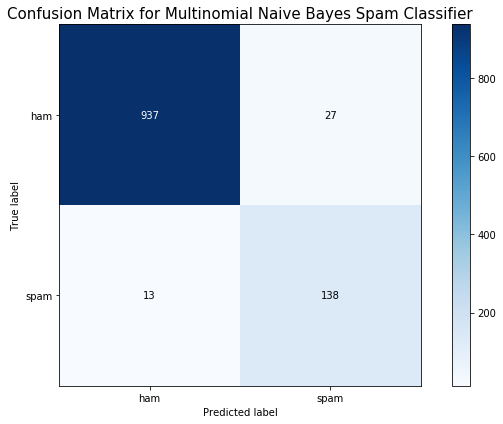

In [14]:
# Plot confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_hat_test, figsize = (9,6))
plt.ylim([1.5, -.5])
plt.title('Confusion Matrix for Multinomial Naive Bayes Spam Classifier', fontsize = 15)
plt.tight_layout()
plt.show()

### Conclusion
Naive Bayes performs very well in this instance for predicting spam. With 96.4% accuracy on the test set along with high recall and precision, this model is a very capable spam classifier.